In [3]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder


In [4]:
df = pd.read_csv("./dataset_Facebook.csv", delimiter = ";")


In [5]:
df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


In [6]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")


In [7]:
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
features = ["age",
            "job",
            "marital",
            "education",
            "default",
            "housing",
            "loan",
           "contact",
           "month",
           "day_of_week",
           "campaign",
           "pdays",
           "previous",
           "poutcome",
           "emp.var.rate",
           "cons.price.idx",
           "cons.conf.idx",
           "euribor3m",
           "nr.employed",
           "duration"]


In [9]:
df[features].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,261
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,149
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,226
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,151
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,307


In [10]:
outcome = ["y"]


In [11]:
df[outcome].head()


,y
0,no
1,no
2,no
3,no
4,no


In [12]:
df[["job"]] = df[["job"]].apply(LabelEncoder().fit_transform)

In [13]:
df[features]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration
0,56,3,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,261
1,57,7,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,149
2,37,7,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,226
3,40,0,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,151
4,56,7,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,307
5,45,7,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,198
6,59,0,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,139
7,41,1,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,217
8,24,9,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,380
9,25,7,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,50


In [14]:
pd.get_dummies(df)


,age,job,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,3,261,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
1,57,7,149,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
2,37,7,226,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
3,40,0,151,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
4,56,7,307,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
5,45,7,198,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
6,59,0,139,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
7,41,1,217,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
8,24,9,380,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
9,25,7,50,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0


In [15]:
pd


<module 'pandas' from '/usr/local/lib/python2.7/dist-packages/pandas/__init__.pyc'>

In [16]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,7,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,0,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,1,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,9,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,7,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
df = df.dropna()

In [18]:
n_bins = 10

X_df = df[features].copy()
y_df = df[outcome].copy()

In [19]:
X_df = pd.get_dummies(X_df)

In [20]:
X_df


,age,job,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,3,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,7,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,7,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,7,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
5,45,7,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
6,59,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
7,41,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
8,24,9,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
9,25,7,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
y_df


,y
0,no
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


In [22]:
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,7,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,0,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,1,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,9,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,7,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
y_df = pd.get_dummies(y_df)

In [24]:
y_df

,y_no,y_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [25]:
del y_df["y_no"]

In [26]:
y_df

,y_yes
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


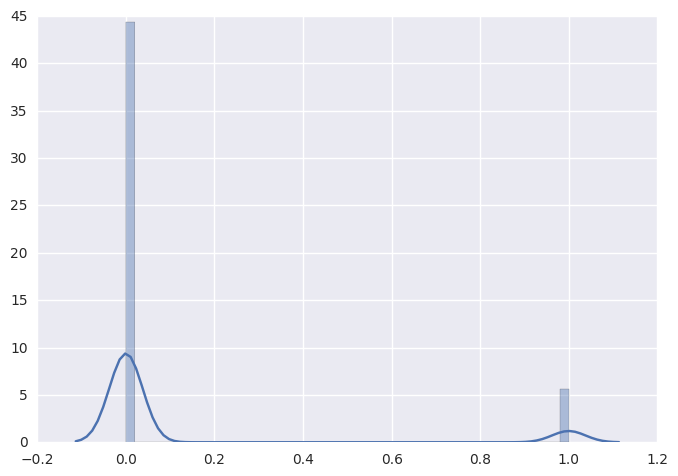

In [27]:
sns_plot = sns.distplot(y_df).get_figure()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [47]:
clf = ExtraTreesClassifier(n_estimators = 400, max_depth = 3)

In [48]:
dummy_clf = DummyClassifier()

In [49]:
X = X_df.values
y = y_df.values.T[0]

In [50]:
scores = cross_val_score(clf, X, y, cv=2,scoring = make_scorer(acc))

dummy_clf.fit(X,y)

print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f")% (acc(y,dummy_clf.predict(X)))


ACC: 0.61 (+/- 0.27)
Dummy ACC: 0.80


In [39]:
scores = cross_val_score(clf, X, y, cv=2,scoring = make_scorer(acc))

dummy_clf.fit(X,y)

print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f")% (acc(y,dummy_clf.predict(X)))


ACC: 0.62 (+/- 0.25)
Dummy ACC: 0.80


In [45]:
clf_r = RandomForestClassifier(n_estimators = 1000, max_depth = 3)

In [46]:
scores = cross_val_score(clf_r, X, y, cv=2,scoring = make_scorer(acc))

dummy_clf.fit(X,y)

print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f")% (acc(y,dummy_clf.predict(X)))

ACC: 0.61 (+/- 0.28)
Dummy ACC: 0.80


In [51]:
from sklearn.svm import SVC

In [52]:
clf_s = SVC(kernel="linear", C=0.025)


In [53]:
X


array([[ 56.,   3.,   1., ...,   0.,   1.,   0.],
       [ 57.,   7.,   1., ...,   0.,   1.,   0.],
       [ 37.,   7.,   1., ...,   0.,   1.,   0.],
       ..., 
       [ 56.,   5.,   2., ...,   0.,   1.,   0.],
       [ 44.,   9.,   1., ...,   0.,   1.,   0.],
       [ 74.,   5.,   3., ...,   1.,   0.,   0.]])

In [54]:
X[0
 ]

array([  5.60000000e+01,   3.00000000e+00,   1.00000000e+00,
         9.99000000e+02,   0.00000000e+00,   1.10000000e+00,
         9.39940000e+01,  -3.64000000e+01,   4.85700000e+00,
         5.19100000e+03,   2.61000000e+02,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [55]:
scores = cross_val_score(clf_s, X, y, cv=2,scoring = make_scorer(acc))

dummy_clf.fit(X,y)

print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f")% (acc(y,dummy_clf.predict(X)))

ACC: 0.62 (+/- 0.27)
Dummy ACC: 0.80


In [56]:
y


array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)